In [114]:
from astropy.io import fits
import time
#import urllib2# python2
import urllib#python3

import datetime
#from itertools import ifilter python2
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET
import h5py
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import bibtexparser

pd.set_option('mode.chained_assignment','warn')

In [115]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
#rcParams["savefig.dpi"] = 300

# imX,stX,gleamX,bssX,superX,

# gleam data

In [4]:
gleam=fits.open('/Users/brettlv/Downloads/mwa_paper/GLEAM_EGC_v2.fits')

gleam.info()

gleam[0].header

gleam[1].header

In [7]:
gleam[1].columns

ColDefs(
    name = 'Name'; format = '20A'
    name = 'background_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'local_rms_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'ra_str'; format = '11A'; unit = 'h:m:s'
    name = 'dec_str'; format = '12A'; unit = 'd:m:s'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'
    name = 'err_RAJ2000'; format = 'D'; unit = 'deg'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'
    name = 'err_DEJ2000'; format = 'D'; unit = 'deg'
    name = 'peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'err_peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'err_int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'a_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_a_wide'; format = 'E'; unit = 'arcsec'
    name = 'b_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_b_wide'; format = 'E'; unit = 'arcsec'
    name = 'pa_wide'; format = 'E'; unit = 'deg'
    name = 'err_pa_wide'; form

## gleamdata alpha_select

In [5]:
gleamdata=gleam[1].data
gleamdata_alpha_select_1=gleamdata[gleamdata['alpha']>0.2]#mean -0.8
gleamdata_alpha_select_2=gleamdata[gleamdata['alpha']<-1.8]#mean -0.8

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


## gleam sight of view

Text(0.5, 1.0, 'gleam sight of view')

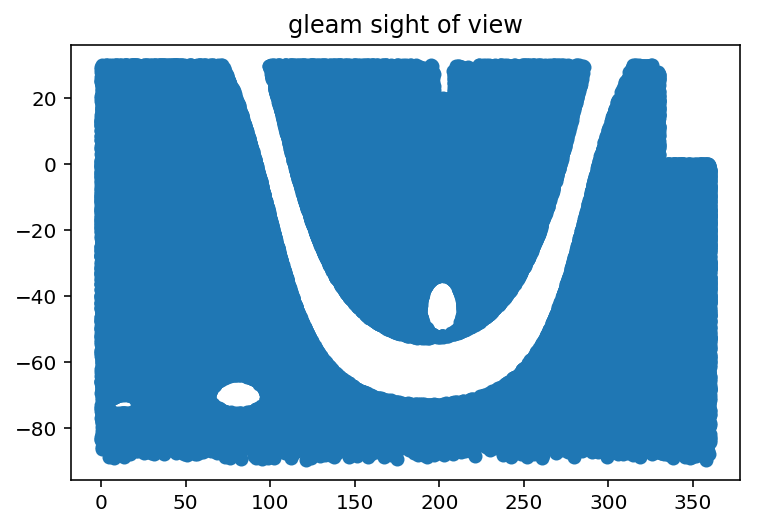

In [10]:
plt.scatter(gleamdata['RAJ2000'],gleamdata['DEJ2000'])
plt.title('gleam sight of view')

plt.hist(gleamdata['alpha'],range=(-2,0.5),bins=100)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         53.,  88., 113.,  86.,  93.,  84.,  74.,  55.,  53.,  58.,  73.,
         56.,  58.,  58.,  38.,  47.,  48.,  43.,  39.,  43.,  42.,  41.,
         34.,  30.,  33.,  26.,  23.,  38.,  24.,  20.,  23.,  22.,  22.,
         23.,  26.,  14.,  24.,  15.,  25.,  15.,  13.,  20.,  14.,  18.,
         12.,  14.,  15.,  17.,   9.,   9.,   9.,   6.,  12.,  12.,   9.,
          9.,  11.,   7.,   9.,  16.,   5.,   8.,  11.,   8.,   2.,   4.,
          8.]),
 array([-0.2  , -0.188, -0.176, -0.164, -0.152, -0.14 , -0.128, -0.116,
        -0.104, -0.092, -0.08 , -0.068, -0.056, -0.044, -0.032, -0.02 ,
        -0.008,  0.004,  0.016,  0.028,  0.04 ,  0.052,  0.064,  0.076,
         0.088,  0.1  ,  0.112,  0.124,  0.136,  0.148,  0.16 ,  0.172,
         0.184,  0.196,  0.208

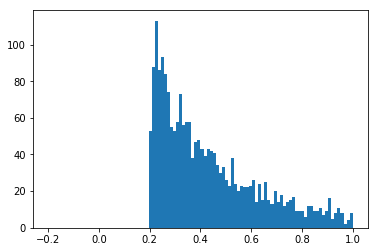

In [30]:
plt.hist(gleamdata_alpha_select_1['alpha'],range=(-0.2,1),bins=100)

(array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  2.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  2.,  1.,  2.,  0.,  3.,  0.,  1.,  0.,
         2.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  3.,  1.,  0.,  4.,
         2.,  0.,  3.,  3.,  3.,  2.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,
         3.,  3.,  1.,  3.,  3.,  0.,  2.,  2.,  3.,  6.,  3.,  6.,  2.,
         5.,  4.,  3.,  2.,  6.,  7.,  5.,  4.,  3.,  7.,  4.,  8.,  5.,
         2.,  4.,  8.,  8.,  4., 11., 10.,  6., 10.]),
 array([-2.5  , -2.493, -2.486, -2.479, -2.472, -2.465, -2.458, -2.451,
        -2.444, -2.437, -2.43 , -2.423, -2.416, -2.409, -2.402, -2.395,
        -2.388, -2.381, -2.374, -2.367, -2.36 , -2.353, -2.346, -2.339,
        -2.332, -2.325, -2.318, -2.311, -2.304, -2.297, -2.29 , -2.283,
        -2.276, -2.269, -2.262, -2.255, -2.248, -2.241, -2.234, -2.227,
        -2.22 , -2.213, -2.206, -2.199, -2.192, -2.185, -2.178, -2.171,
  

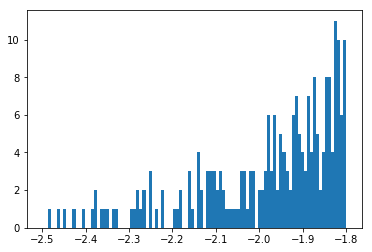

In [31]:
plt.hist(gleamdata_alpha_select_2['alpha'],range=(-2.5,-1.8),bins=100)

In [25]:
gleamdata_alpha_select_1.size,gleamdata_alpha_select_2.size

(2208, 244)

gleamdata_alpha_select_2['Name']

In [36]:
?fetch_sdss_S82standards

## SDSS imaging data

In [46]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import os
import sys
from time import time

import numpy as np
from matplotlib import pyplot as plt

from astropy.visualization import hist

from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

# get imaging data
#image_data = fetch_imaging_sample()
image_data_fit=fits.open('/Users/brettlv/astroML_data/sgSDSSimagingSample.fit')
image_data=image_data_fit[1].data
imX = np.empty((len(image_data), 2), dtype=np.float64)
imX[:, 0] = image_data['ra']
imX[:, 1] = image_data['dec']


In [116]:
image_data_fit[1].data.columns

ColDefs(
    name = 'ra'; format = '1D'; dim = '(1)'
    name = 'dec'; format = '1D'; dim = '(1)'
    name = 'run'; format = '1I'; null = -99; dim = '(1)'
    name = 'rExtSFD'; format = '1D'; dim = '(1)'
    name = 'uRaw'; format = '1D'; dim = '(1)'
    name = 'gRaw'; format = '1D'; dim = '(1)'
    name = 'rRaw'; format = '1D'; dim = '(1)'
    name = 'iRaw'; format = '1D'; dim = '(1)'
    name = 'zRaw'; format = '1D'; dim = '(1)'
    name = 'uErr'; format = '1D'; dim = '(1)'
    name = 'gErr'; format = '1D'; dim = '(1)'
    name = 'rErr'; format = '1D'; dim = '(1)'
    name = 'iErr'; format = '1D'; dim = '(1)'
    name = 'zErr'; format = '1D'; dim = '(1)'
    name = 'uRawPSF'; format = '1D'; dim = '(1)'
    name = 'gRawPSF'; format = '1D'; dim = '(1)'
    name = 'rRawPSF'; format = '1D'; dim = '(1)'
    name = 'iRawPSF'; format = '1D'; dim = '(1)'
    name = 'zRawPSF'; format = '1D'; dim = '(1)'
    name = 'upsfErr'; format = '1D'; dim = '(1)'
    name = 'gpsfErr'; format = '1D'; dim =

## SDSS Stripe 82 standard stars data

In [98]:
# get standard stars
#standards_data = fetch_sdss_S82standards()
import pandas as pd
standards_data=pd.read_table('/Users/brettlv/astroML_data/stripe82calibStars_v2.6.dat',header=None,skiprows=range(0, 41),sep='\s+')
print(standards_data.columns)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: read_table is deprecated, use read_csv instead.


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36],
           dtype='int64')


In [ ]:
### This is file stripe82calibStars_v2.6.dat created by ZI on Mar 8,2007
###
### A catalog of 1,006,849 candidate standard stars from SDSS stripe 82
###  0) every line starts with the string CALIBSTARS
###  1) RA Dec RArms Decrms: the mean position and its rms per coordinate,
###     this is J2000, decimal degrees for RA and Dec, and arcsec for rms
###     NB: standard errors can be computed as rms/sqrt(Ntot)
###  2) Ntot: the total number of epochs
###  3) Ar: the Schlegel, Finkbeiner & Davis (1998) ISM extinction value in
###     the r band; extinction in other bands can be computed as [Rv=3.1]:
###     Am = Cm*Ar, with Cm=(1.873, 1.377, 0.758, 0.537) for m=(ugiz)
###  4) and then in each band (ugriz, in this order):
###       (Nobs mmed mmu msig mrms mchi2), which are:
###       the total number of observations in this band
###       the median magnitude
###       the mean magnitude
###       the standard error for the mean (1.25 larger for the median)
###       the root-mean-square scatter
###       chi2 per degree of freedom (computed using the mean magnitude)

In [99]:
standards_data.rename(columns={0:'CALIBSTARS',1:'RA',2:'DEC',3:'RArms', 4:'Decrms',5:'Ntot_epochs'}, inplace = True)

In [100]:
len(standards_data)

1006849

In [101]:
standards_data.head()

,CALIBSTARS,RA,DEC,RArms,Decrms,Ntot_epochs,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,CALIBSTARS,308.500214,-1.227721,0.032,0.032,4,0.587,0,0.066,0.066,...,20.202,0.019,0.053,2.0,4,19.878,19.809,0.047,0.139,2.4
1,CALIBSTARS,308.500092,-1.240264,0.015,0.015,4,0.596,4,21.804,21.821,...,19.465,0.012,0.027,1.1,4,19.317,19.305,0.031,0.048,0.5
2,CALIBSTARS,308.500092,-1.217156,0.009,0.024,4,0.579,4,19.439,19.443,...,17.050,0.006,0.020,2.2,4,16.890,16.890,0.010,0.007,0.1
3,CALIBSTARS,308.501892,-1.176492,0.005,0.024,4,0.559,4,20.561,20.553,...,17.205,0.011,0.024,0.3,4,16.966,16.963,0.012,0.009,0.2
4,CALIBSTARS,308.504608,-1.174189,0.028,0.038,4,0.556,0,0.068,0.068,...,20.337,0.020,0.066,2.4,4,19.719,19.712,0.043,0.147,3.0


In [102]:
standards_data.columns

Index([ 'CALIBSTARS',          'RA',         'DEC',       'RArms',
            'Decrms', 'Ntot_epochs',             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
                  24,            25,            26,            27,
                  28,            29,            30,            31,
                  32,            33,            34,            35,
                  36],
      dtype='object')

In [103]:
stX = np.empty((len(standards_data), 2), dtype=np.float64)
stX[:, 0] = standards_data['RA']
stX[:, 1] = standards_data['DEC']

# crossmatch catalogs 
## SDSS imaging data && Stripe 82 standard stars

In [136]:
?crossmatch_angular

In [ ]:
Returns
-------
dist, ind: ndarrays
    The angular distance and index of the closest point in X2 to
    each point in X1.  Both arrays are length N1.
    Locations with no match are indicated by
    dist[i] = inf, ind[i] = N2

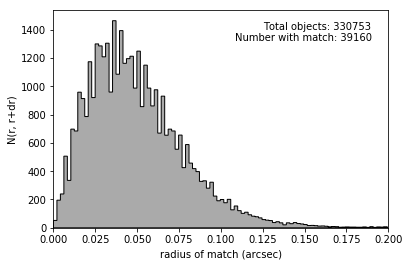

In [130]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(imX, stX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

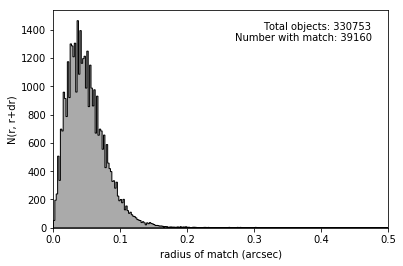

In [134]:
ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 0.5)

plt.show()

## SDSS imaging data and gleamdata

In [ ]:
len(gleamdata_alpha_select_2)

In [106]:
gleamdata_alpha_select_2.columns

ColDefs(
    name = 'Name'; format = '20A'
    name = 'background_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'local_rms_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'ra_str'; format = '11A'; unit = 'h:m:s'
    name = 'dec_str'; format = '12A'; unit = 'd:m:s'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'
    name = 'err_RAJ2000'; format = 'D'; unit = 'deg'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'
    name = 'err_DEJ2000'; format = 'D'; unit = 'deg'
    name = 'peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'err_peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'err_int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'a_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_a_wide'; format = 'E'; unit = 'arcsec'
    name = 'b_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_b_wide'; format = 'E'; unit = 'arcsec'
    name = 'pa_wide'; format = 'E'; unit = 'deg'
    name = 'err_pa_wide'; form

## gleamX

In [108]:
gleamX = np.empty((len(gleamdata_alpha_select_2), 2), dtype=np.float64)
gleamX[:, 0] = gleamdata_alpha_select_2['RAJ2000']
gleamX[:, 1] = gleamdata_alpha_select_2['DEJ2000']

In [127]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(gleamX, imX, max_radius)
match = ~np.isinf(dist)

dist_match = dist[match]
dist_match *= 3600

In [128]:
dist_match

array([], dtype=float64)

## SDSS Stripe 82 standard stars data

In [ ]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(gleamX, stX, max_radius)
match = ~np.isinf(dist)

dist_match = dist[match]
dist_match *= 3600

### RA hist

(array([28., 36., 26., 16., 36., 12., 20., 10., 41., 19.]),
 array([1.93020448e-01, 3.57785005e+01, 7.13639806e+01, 1.06949461e+02,
        1.42534941e+02, 1.78120421e+02, 2.13705901e+02, 2.49291381e+02,
        2.84876861e+02, 3.20462341e+02, 3.56047821e+02]),
 <a list of 10 Patch objects>)

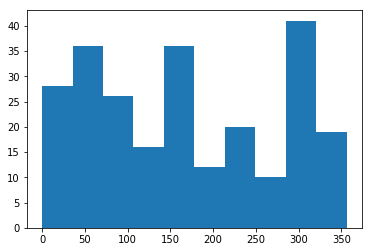

In [120]:
plt.hist(gleamX[:, 0])

(array([32738., 32778., 30774., 31411., 31207., 35933., 34219., 35149.,
        32798., 33746.]),
 array([2.0000000e-06, 1.0000011e+00, 2.0000002e+00, 2.9999993e+00,
        3.9999984e+00, 4.9999975e+00, 5.9999966e+00, 6.9999957e+00,
        7.9999948e+00, 8.9999939e+00, 9.9999930e+00]),
 <a list of 10 Patch objects>)

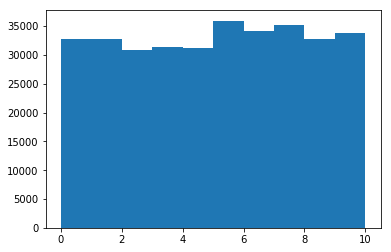

In [121]:
plt.hist(imX[:, 0])

(array([182573., 142533.,      0.,      0.,      0.,      0.,      0.,
             0., 344818., 336925.]),
 array([2.01000000e-04, 3.60001656e+01, 7.20001303e+01, 1.08000095e+02,
        1.44000060e+02, 1.80000024e+02, 2.15999989e+02, 2.51999953e+02,
        2.87999918e+02, 3.23999883e+02, 3.59999847e+02]),
 <a list of 10 Patch objects>)

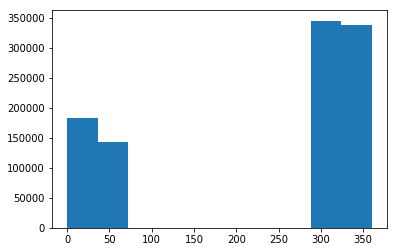

In [122]:
plt.hist(stX[:, 0])

In [119]:
gleamX[:, 0][:5],imX[:,0][:-5]

(array([323.72918701, 349.3913269 , 324.17333984, 316.2208252 ,
        333.95874023]),
 array([0.358174, 0.358382, 0.357898, ..., 3.836565, 3.847469, 3.846871]))

In [ ]:
gleam.close()

# the AT20G Bright Source Sample (BSS) catalogue

one from a radio survey,   
J/MNRAS/384/775 Australia Telescope 20-GHz Survey. BSS (Massardi+, 2008)

#  the SuperCOSMOS all-sky galaxy catalogue.

http://ssa.roe.ac.uk/allSky

an optical survey

All-sky Galaxy catalogue
The purpose of this page is to make directly available the SuperCOSMOS all-sky galaxy catalogue, generated from scans of the UKST and POSS2 photographic Schmidt surveys and described in Peacock et al. (2016). This optical material was matched with WISE to produce the WISExSCOS photometric redshift catalogue.
What is released

A table of objects to optical limits of B<21.5, R<20; 
this is deeper than the limits adopted in the WISExSCOS work, allowing users to vary the limit if desired. The columns are objID, ra, dec, Bmag, Bcal, Bcc, Rmag, Rcal, Rcc, Imag, Ical, Icc, Ebmv. The various magnitudes are observed (mag), adjusted for the slight hemispheric offset between photometric systems as described in Peacock et al. (cal); further corrected for extinction (cc).
An additional table of objects that fill holes in the sky coverage left by calibration stepwedges on the plates. Mainly affecting POSS2 scans, these regions are omitted in the standard SSA database, although they can be accessed from the original SuperCOSMOS scans by using regions from an adjoining plate beyond the default central 5 x 5 degrees. The data in these regions is lower in quality, so we include only objects that paired up with WISE. The full SuperCOSMOS all-sky catalogue should be considered to consist of the main table plus these additional objects.
A table of calibration properties for the photographic plates that are the basis for the catalogue. Columns are Field number, B-band linearity, zero point, slump coefficient (and same for R & I); the three coefficients are defined in equations 9 & 11 of Peacock et al. (2016). The plate-centre positions of the UKST and POSS2 plates are listed in http://www.roe.ac.uk/ifa/wfau/ukstu/ukstf.html and http://www.roe.ac.uk/ifa/wfau/ukstu/possf.html. The POSS2 field numbers have been increased by 1000, in order to have a unique number over the whole sky. This information may be used if desired to mask out plates of lower depth as diagnosed by the zero point.

In [146]:
def hms2dec(hours, minutes, seconds):
    result = 15 * (hours + minutes/60 + seconds/(60*60))
    return result


def dms2dec(degrees, arcminutes, arcseconds):
    if(degrees > 0):
        result = degrees + arcminutes/60 + arcseconds/(60*60)
    else:
        positive_degrees = degrees * -1
        result = -1 * (positive_degrees + arcminutes/60 + arcseconds/(60*60))

    return result

def import_bss():
    # Import file
    cat = np.loadtxt('/Users/brettlv/Downloads/mwa_paper/sample_cross_match/agn-cross-matching/data/bss.dat', usecols=range(1, 7))
    coordinates = []

    for index, row in enumerate(cat):
        ascention = hms2dec(row[0], row[1], row[2])
        declination = dms2dec(row[3], row[4], row[5])

        coordinates.append((index + 1, ascention, declination))

    return coordinates


def import_super():
    # Import file
    cat = np.loadtxt('/Users/brettlv/Downloads/mwa_paper/sample_cross_match/agn-cross-matching/data/super.csv', delimiter=',', skiprows=1, usecols=[0, 1])
    coordinates = []

    for index, row in enumerate(cat):
        coordinates.append((index + 1, row[0], row[1]))

    # Add index column
    return coordinates

In [147]:
bss_cat = import_bss()
super_cat = import_super()

In [158]:
bss_cat=np.array(bss_cat)
super_cat=np.array(super_cat)

In [165]:
len(bss_cat)

160

## cross-match-bss-super

In [167]:
bssX = np.empty((len(bss_cat), 2), dtype=np.float64)
bssX[:, 0] = bss_cat[:,1]
bssX[:, 1] = bss_cat[:,2]

superX = np.empty((len(super_cat), 2), dtype=np.float64)
superX[:, 0] = super_cat[:,1]
superX[:, 1] = super_cat[:,2]

In [174]:
# crossmatch catalogs
max_radius = 40. / 3600  # 40 arcsec
dist, ind = crossmatch_angular(bssX, superX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

In [179]:
len(bss_cat),len(super_cat)

(160, 500)

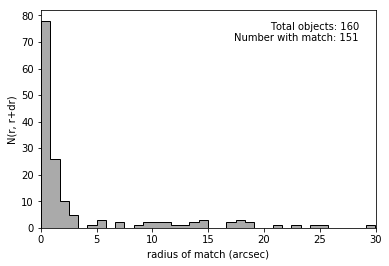

In [178]:
ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (bssX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 30)

plt.show()

## bss-gleam

(array([ 5.,  5.,  9., 15., 13., 19., 17., 21., 28., 28.]),
 array([-83.73630556, -76.93280556, -70.12930556, -63.32580556,
        -56.52230556, -49.71880556, -42.91530556, -36.11180556,
        -29.30830556, -22.50480556, -15.70130556]),
 <a list of 10 Patch objects>)

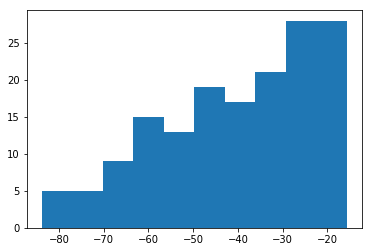

In [185]:
plt.hist(bssX[:,1])

(array([ 5.,  6., 25., 24., 47., 47., 24., 34., 19., 13.]),
 array([-82.30702972, -71.22616882, -60.14530792, -49.06444702,
        -37.98358612, -26.90272522, -15.82186432,  -4.74100342,
          6.33985748,  17.42071838,  28.50157928]),
 <a list of 10 Patch objects>)

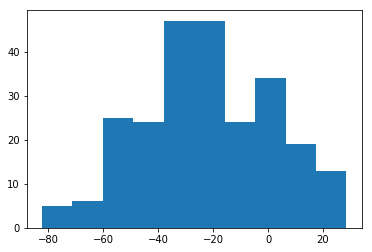

In [184]:
plt.hist(gleamX[:,1])

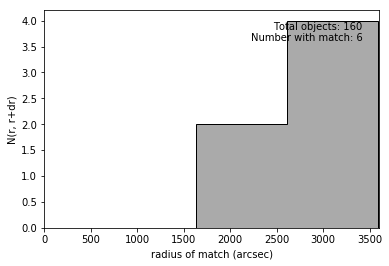

In [187]:
# crossmatch catalogs
max_radius = 3600. / 3600  # 40 arcsec
dist, ind = crossmatch_angular(bssX, gleamX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (bssX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 3600)

plt.show()

# SPITZER, GALEX, and GMRT mission catalogs

Python codes to implement multi-wavelength cross-matching of CSV data files of SPITZER, GALEX, and GMRT mission catalogs to create a master catalog

# The remnant radio galaxy associated with NGC 1534

In [ ]:
https://arxiv.org/pdf/1806.09255.pdf

# LAT 8-year Source Catalog (4FGL)

In [188]:
FGL_4=fits.open('/Users/brettlv/Downloads/mwa_paper/gll_psc_v21.fit')

In [189]:
FGL_4.info()

Filename: /Users/brettlv/Downloads/mwa_paper/gll_psc_v21.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    477   5065R x 84C   [18A, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 8E, 16E, 8E, E, E, E, E, E, E, D, E, 48E, 96E, 48E, 18A, 18A, 18A, 18A, 18A, A, 30A, 5A, 10A, 28A, 30A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1748R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     77   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     43   9R x 1C   [D]   
  7  Hist2_Start    1 BinTa

FGL_4[1].data.columns

FGL_4[2].header,FGL_4[2].data.columns

In [ ]:
name = 'Source_Name'; format = '18A'
name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'

## FGL_4X 

In [209]:
FGL_4X = np.empty((len(FGL_4[1].data), 2), dtype=np.float64)#LAT_Point_Source_Catalog
FGL_4X[:, 0] = FGL_4[1].data['RAJ2000']
FGL_4X[:, 1] = FGL_4[1].data['DEJ2000']

gleamALLX = np.empty((len(gleamdata), 2), dtype=np.float64)
gleamALLX[:, 0] = gleamdata['RAJ2000']
gleamALLX[:, 1] = gleamdata['DEJ2000']

## FGL-gleam cross

In [227]:
len(FGL_4[1].data)

5065

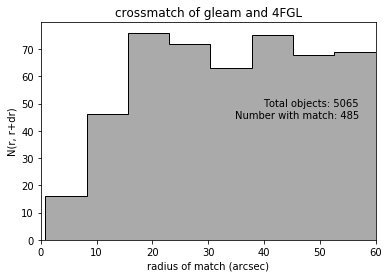

In [237]:
# crossmatch catalogs

max_radius = 60 / 3600  # 60 arcsec
dist, ind = crossmatch_angular(FGL_4X,gleamALLX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec


ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.65,
        "Total objects: %i\nNumber with match: %i" % (FGL_4X.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 60)
plt.title('crossmatch of gleam and 4FGL')
plt.savefig('/Users/brettlv/Downloads/cross-match_of_gleam_and_4FGL.png',dpi=300)
plt.show()

In [229]:
len(match)

5065

In [230]:
FGL_4Xsourecename=FGL_4[1].data['Source_Name']

matchname=FGL_4Xsourecename[match]
matchra=FGL_4[1].data['RAJ2000'][match]
matchdec=FGL_4[1].data['DEJ2000'][match]

In [233]:
print('name,')
for i,j,k,l in zip(matchname,matchra,matchdec,dist_match):
    print(i,j,k,l)

4FGL J0001.5+2113 0.3815 21.2183 29.98785226987956
4FGL J0009.8-4317 2.4533 -43.2979 49.36134820679828
4FGL J0013.9-1854 3.4804 -18.9118 45.94455768861641
4FGL J0014.2+0854 3.5695 8.9114 58.82200577689135
4FGL J0019.3-8152 4.8327 -81.8798 8.063410693218586
4FGL J0019.6+2022 4.907 20.3755 49.898943819987636
4FGL J0022.5+0608 5.6376 6.1343 19.182290383102206
4FGL J0026.6-4600 6.6521 -46.0156 12.266172121091847
4FGL J0033.5-1921 8.3954 -19.3593 37.94120154355769
4FGL J0034.0-4116 8.5142 -41.2708 15.708184758104695
4FGL J0034.3-0534 8.5961 -5.5809 28.407295009688514
4FGL J0038.1+0012 9.5394 0.2118 50.49221088477483
4FGL J0038.2-2459 9.5652 -24.9899 31.192947332957825
4FGL J0039.1-2219 9.7782 -22.3276 26.224402252707126
4FGL J0040.4-2340 10.1012 -23.6704 23.985058865428492
4FGL J0045.1-3706 11.2936 -37.1065 37.09341447993075
4FGL J0045.3+2128 11.3396 21.4668 48.03924166506121
4FGL J0045.7+1217 11.4309 12.292 18.30579604109755
4FGL J0047.5-2517 11.8978 -25.29 34.29844467107718
4FGL J0049.7+0

# RRAT 
http://astro.phys.wvu.edu/rratalog/

In [ ]:
PSRJ            J1913+1330
RAJ             19:13:17.97                   1.000e-02
DECJ            +13:30:32.78                  4.000e-02
DM              175.64                        6.000e-02

In [8]:
19*15+13*15/60+17.97*15/3600

288.324875

In [9]:
13+30/60+32.78/3600

13.509105555555555

In [ ]:
J1913+1330	0.923	8.68	175.64	19:13:18	13:30:33	47.42	1.38	4.71	,'12.4	6.2	5.7	--	--	650	--	--	2	945	40	PM1 / K11

# mwa_table

In [98]:
import pandas as pd
import xml.etree.ElementTree as ET

from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
from astropy.io.votable.tree import VOTableFile, Resource, Table, Field



path = '/Users/brettlv/Downloads/results_from-2018-03-10-D0014-outburstmonitoring.xml'
votable = parse(path)


table = parse_single_table(path)


data = table.array
dfcols = ['obs_id','s_ra', 's_dec', 's_fov','t_min','t_max','t_exptime','em_min','em_max']
#df = pd.DataFrame(columns=dfcols)
#df.head()

In [99]:
table = parse_single_table(path).to_table()

In [118]:
table.colnames[10],table.colnames[11]

('t_min', 't_max')

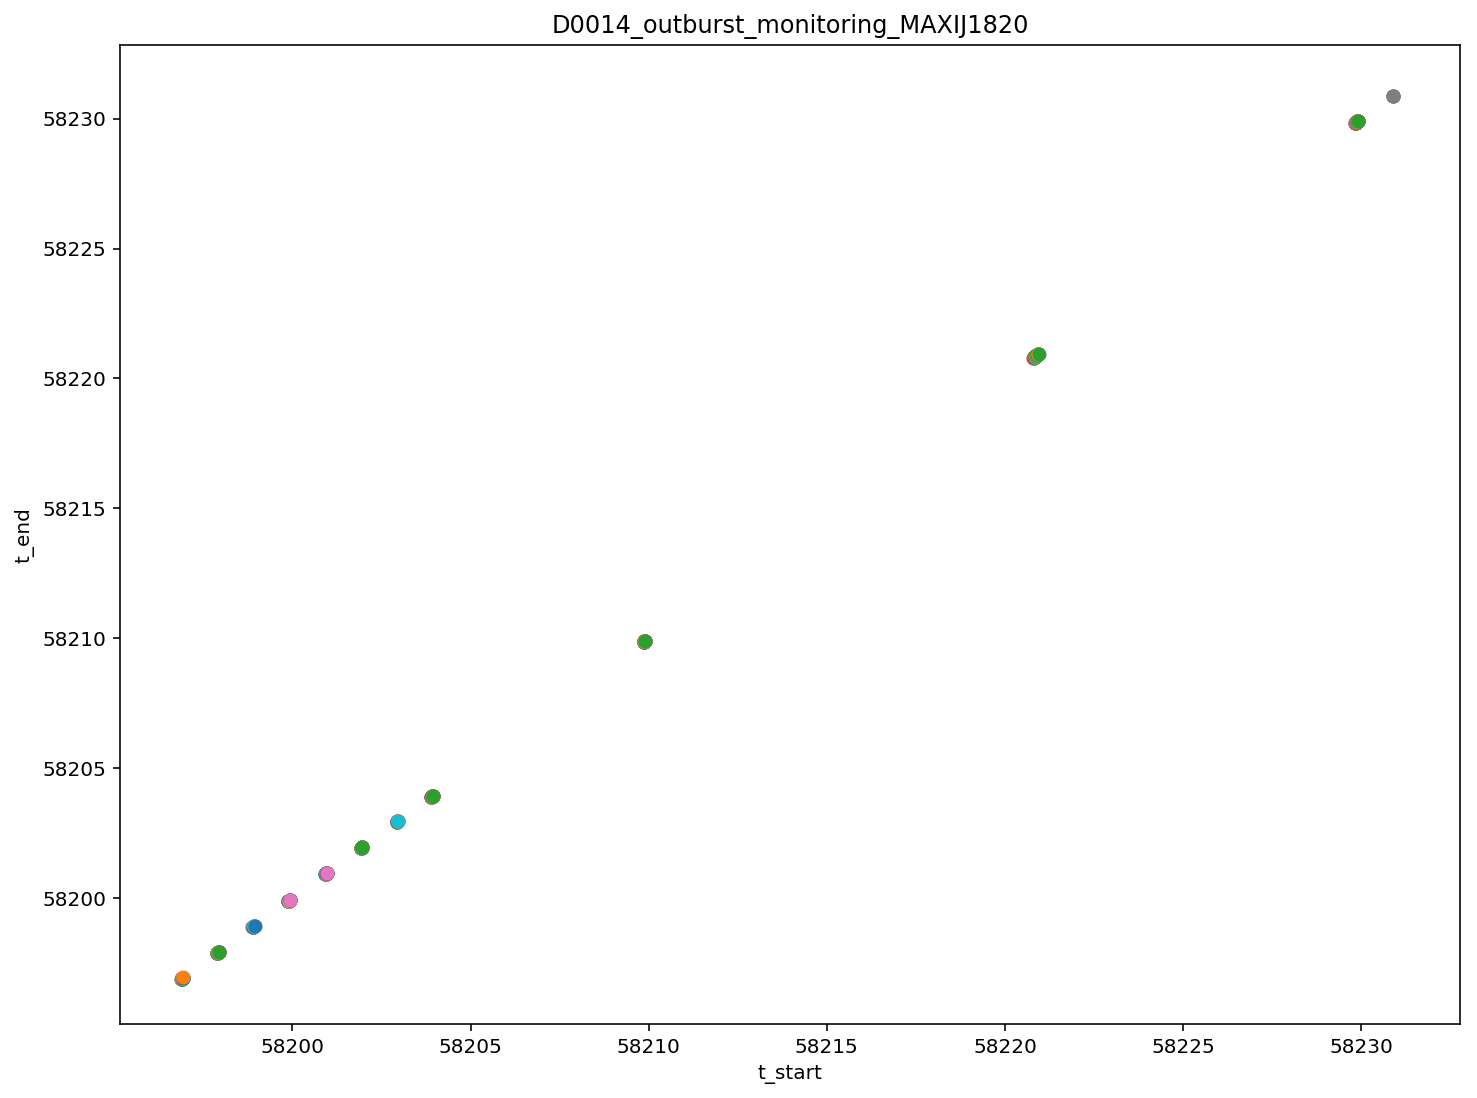

In [126]:
fix,ax=plt.subplots(1, 1,figsize=(12,9))
for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    plt.scatter(i,j)
plt.xlabel('t_start')
plt.ylabel('t_end')
plt.title('D0014_outburst_monitoring_MAXIJ1820')
plt.savefig('/Users/brettlv/Downloads/MAXIJ1820/D0014_outburst_monitoring.png')

In [124]:
path_gleam = '/Users/brettlv/Downloads/results_gleam_30degree.xml'
table_gleam = parse_single_table(path_gleam).to_table()

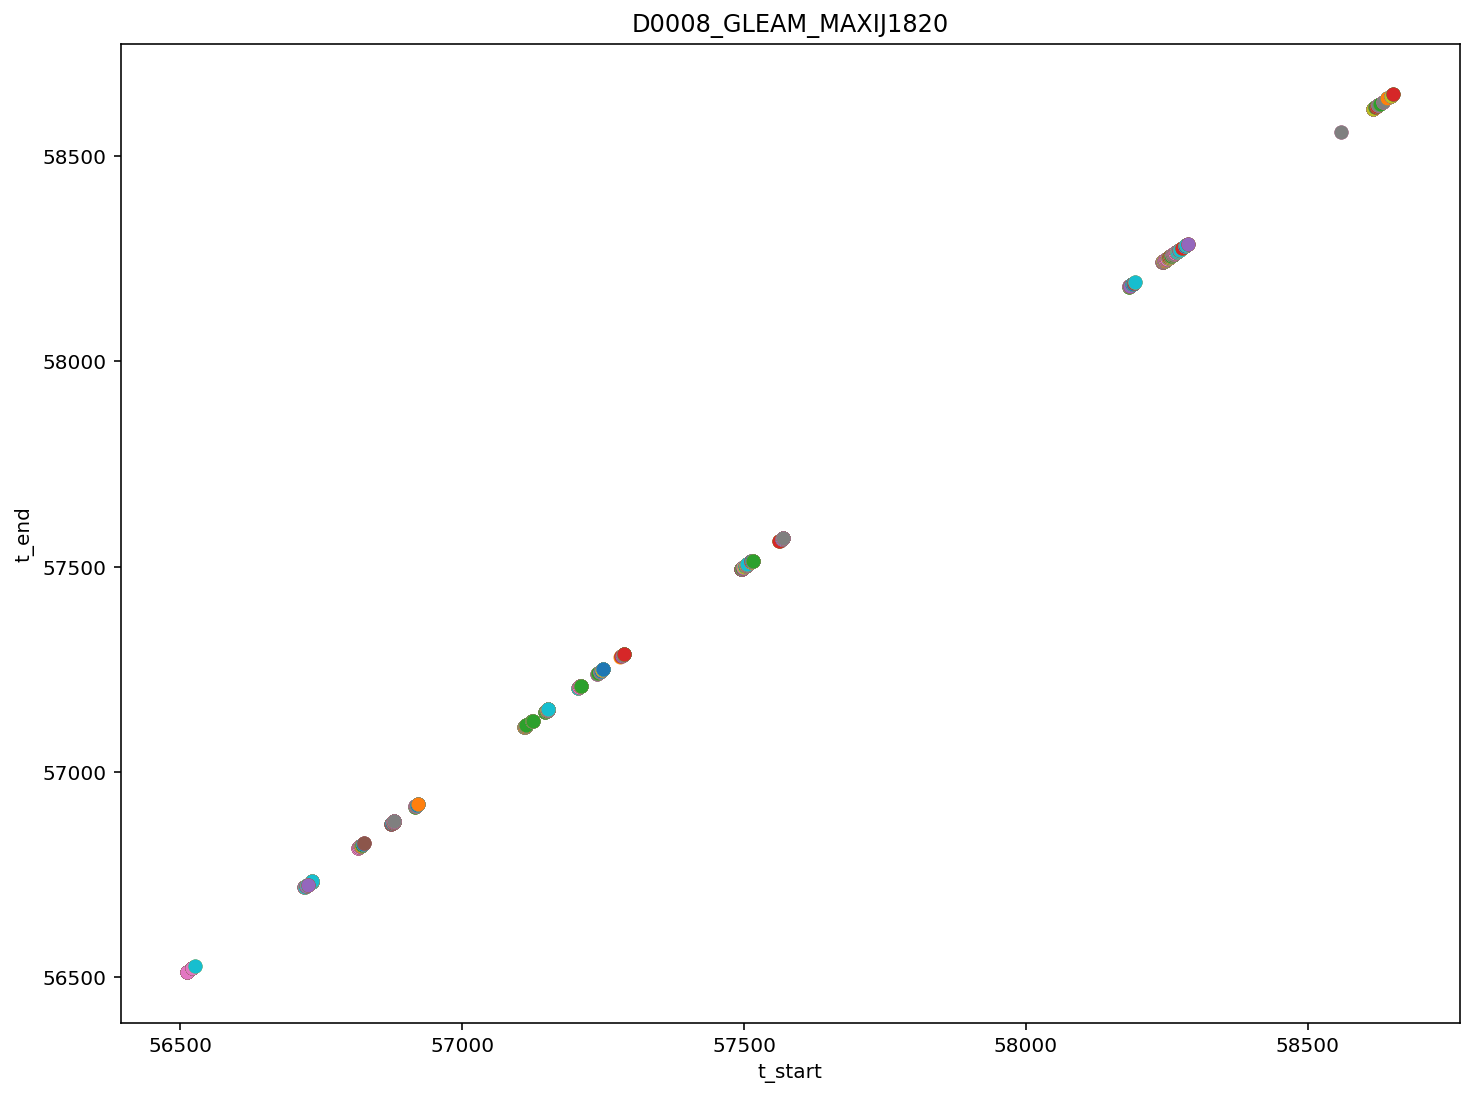

In [127]:
fix,ax=plt.subplots(1, 1,figsize=(12,9))
for i,j in zip(table_gleam[table_gleam.colnames[10]],table_gleam[table_gleam.colnames[11]]):
    plt.scatter(i,j)
plt.xlabel('t_start')
plt.ylabel('t_end')
plt.title('D0008_GLEAM_MAXIJ1820')
plt.savefig('/Users/brettlv/Downloads/MAXIJ1820/D0008_GLEAM_MAXIJ1820.png')